In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('../data/raw/heart_disease_uci.csv')

In [6]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [7]:
print("--- Missing Values ---")

--- Missing Values ---


In [6]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [8]:
print("\n--- Column Data Types ---")


--- Column Data Types ---


In [9]:
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [10]:
print(f"\nTotal Duplicate Rows: {df.duplicated().sum()}")


Total Duplicate Rows: 0


In [12]:
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\MITESH\AppData\Local\Temp\ipykernel_43380\1550507332.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
import duckdb

In [16]:
query = """
SELECT 
    num AS stage,
    COUNT(*) AS patient_count,
    ROUND(AVG(age), 1) AS avg_age,
    ROUND(AVG(chol), 2) AS avg_chol,
    ROUND(AVG(thalch), 1) AS avg_max_heart_rate
FROM df
GROUP BY num
ORDER BY num
"""

profile_result = duckdb.query(query).to_df()
display(profile_result)

,stage,patient_count,avg_age,avg_chol,avg_max_heart_rate
0,0,411,50.5,227.68,148.4
1,1,265,53.5,195.99,131.5
2,2,109,57.6,145.31,129.4
3,3,107,59.2,160.31,122.9
4,4,28,59.2,193.25,128.7


In [17]:
cap_value = df['chol'].quantile(0.99)
df['chol'] = df['chol'].clip(upper=cap_value)

print(f"Cholesterol capped at: {cap_value}")

Cholesterol capped at: 411.42999999999984


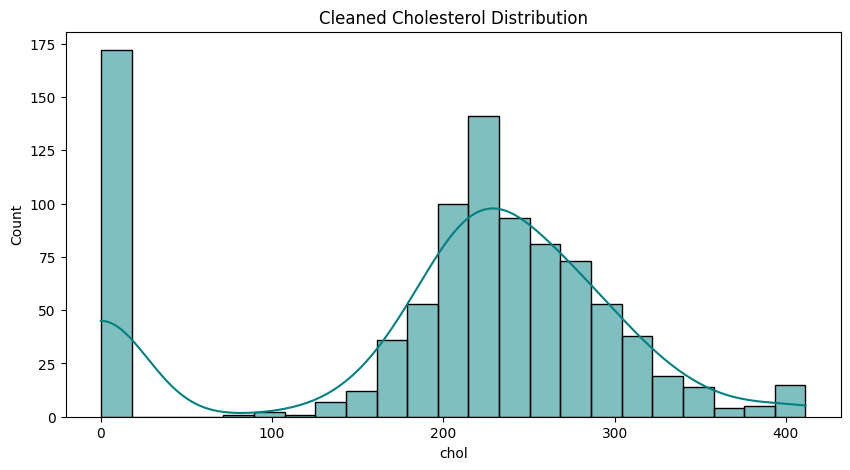

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['chol'], kde=True, color='teal')
plt.title("Cleaned Cholesterol Distribution")
plt.show()